<a href="https://colab.research.google.com/github/ankii7546/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Google Play Store Apps Exploratory Data Analysis (EDA)**

**Introduction**

Google Play Store is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to download applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

<b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import numpy as np
import pandas as pd

In [3]:
#load the play store and user review data in Pandas dataframe
store_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/EDA/Play Store Data.csv")
review_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/EDA/User Reviews.csv")

In [4]:
#look at first 5 records of Play Store data
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#look at a random record of Play Store data
store_df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4713,Easy V-Bux free,FAMILY,4.6,856,2.9M,"5,000+",Free,0,Everyone,Entertainment,"July 17, 2018",1.0,2.1 and up


**Description of App Dataset columns**

App : The name of the app

Category : The category of the app

Rating : The avaerage rating of the app out of 5, in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The total number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [6]:
#getting basic info about play store data
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#we see that some of the column have missing values lets count total sum of null values
store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Data Preparation and Cleaning**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

From above information we see that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , and Android Ver contains null values.

In [8]:
#Deleting the duplicate records
store_df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#Cleaning Type
# Looking at the record that has Type as null
store_df[store_df['Type'].isnull()]

#dropping the record as the Rating is also null
store_df.dropna(subset = ['Type'],inplace=True)

#replacing 0 with Free
store_df['Type']=store_df['Type'].apply(lambda x: x.replace('0','Free'))

#Finding unique elements Type
store_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [11]:
#dropping the record that has Content Rating,Current version and Android version as null
store_df.dropna(subset = ['Content Rating','Current Ver','Android Ver'],inplace=True)


In [12]:
#As Rating column has more no of null values, the data would be effected if we drop all the null records. 
#Let us replace all null values of rating with mode of entire column
store_df['Rating'].fillna(float(store_df['Rating'].mode()),inplace=True)

In [13]:
#Checking if all the null values are removed
store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [15]:
# As we could see Review,Size and Installs should be integer values
#let us have look at values of these columns

#Reviews
store_df['Reviews'].unique()
store_df['Reviews']=store_df['Reviews'].apply(lambda x: (int(x)))


In [16]:
#Size
#It will be better idea to drop the Rows of the column Size having 'Varies with device' values,
#becuase it will be not a better idea to replace those value with mean or mode since, the size of some apps would be too large and some of them too small.
store_df.drop(store_df.loc[store_df['Size'] == 'Varies with device'].index, inplace=True)



In [17]:
#Converting the Size and Installs column from object to integer
#These columns contains some of the special characters like , , + , M , K.
#We need to remove all of these and then convert it to int


def convert_numeric(x):


  x=x.strip('+')# Removing the + Sign
  x=x.strip('$')# Removing the $S Sign
  x=x.replace(',', '')# For removing the `,`
  if 'M' in x:
    x=x.strip('M')
    x=float(x)*1000000
    return int(x)
  elif 'k' in x:
    x=x.strip('k')
    x=float(x)*1000
    return int(x)
  elif '$' in x:
    return(float(x[1:]))       

  
  return float(x)

store_df['Size']=store_df['Size'].apply(lambda x: convert_numeric(x))
store_df['Installs']=store_df['Installs'].apply(lambda x: convert_numeric(x))
store_df['Price']=store_df['Price'].apply(lambda x: convert_numeric(x))



In [18]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9135 non-null   object 
 1   Category        9135 non-null   object 
 2   Rating          9135 non-null   float64
 3   Reviews         9135 non-null   int64  
 4   Size            9135 non-null   int64  
 5   Installs        9135 non-null   float64
 6   Type            9135 non-null   object 
 7   Price           9135 non-null   float64
 8   Content Rating  9135 non-null   object 
 9   Genres          9135 non-null   object 
 10  Last Updated    9135 non-null   object 
 11  Current Ver     9135 non-null   object 
 12  Android Ver     9135 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 999.1+ KB


**Exploratory Analysis and Visualization**

Exploratory Data Analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [19]:
#Import libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9, 5)

**Analysis 1: Categories which have most number of installs?**

In [20]:
highest_installs_df = store_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_installs_df['Installs']=highest_installs_df['Installs'].apply(lambda x: int(float(x)))
highest_installs_df


,Installs
Category,
GAME,29874564253
FAMILY,6798733325
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3526594805
PRODUCTIVITY,2742312744
PHOTOGRAPHY,2557897655
SHOPPING,1504248785
SPORTS,1138949498


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a004d990>],
      dtype=object)

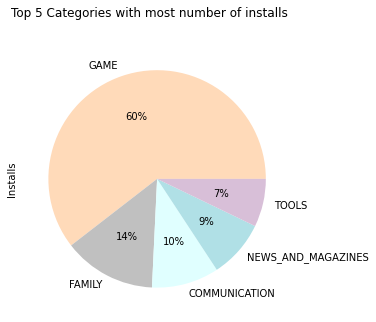

In [21]:
highest_installs_df.head(5).plot(kind='pie',autopct='%1.f%%',colors=['peachpuff','silver','lightcyan','powderblue','thistle'],title="Top 5 Categories with most number of installs",subplots=True,legend=False)



*   When we consider top 5 app install categories. The category is dominated by Gaming by having 60% presence




**Analysis 2: Correlation between Installs, Rating and Review**

In [22]:
corr_df=store_df[['Installs','Rating','Reviews']].corr()
corr_df

,Installs,Rating,Reviews
Installs,1.000000,0.041283,0.627711
Rating,0.041283,1.000000,0.068626
Reviews,0.627711,0.068626,1.000000


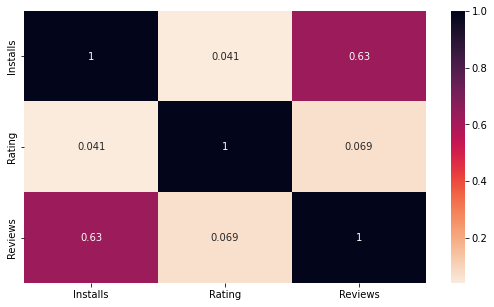

In [23]:
sns.heatmap(corr_df,cmap='rocket_r',  annot=True)

From the graph it is clear that Installs and Reviews are correlated which means that these both are directly proportional

**Analysis 3: Categories to which highest rated(Rating=5) apps belong**

In [24]:
maxrated_df=store_df[store_df['Rating']==5.0]
graph_data=maxrated_df['Category'].value_counts()
graph_data



FAMILY                 65
LIFESTYLE              29
MEDICAL                28
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS_AND_MAGAZINES      6
DATING                  6
SHOPPING                6
PHOTOGRAPHY             6
BOOKS_AND_REFERENCE     5
COMMUNICATION           5
EVENTS                  5
SPORTS                  4
TRAVEL_AND_LOCAL        3
COMICS                  2
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

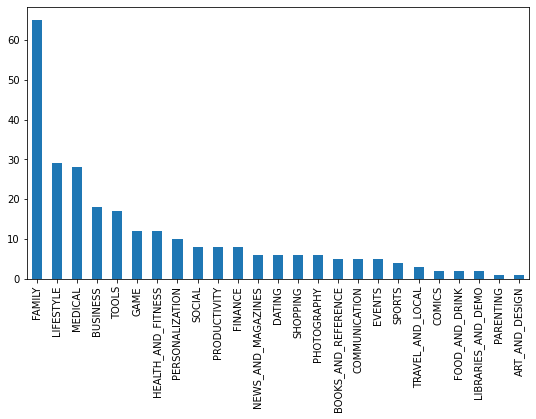

In [25]:
graph_data.plot(kind='bar')



*   The maximum rating in Google app store is 5
*   From the analysis, Family has most no of max rated apps followed by Lifestyle and Medical



<b> Analysis 4: Finding the percentage of paid and free apps in Play Store.


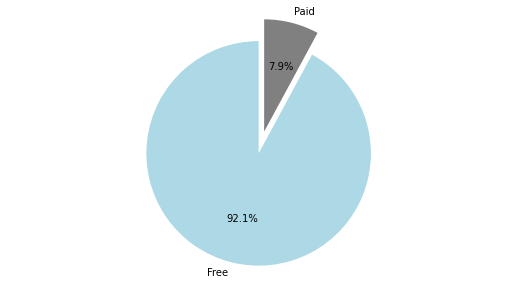

In [26]:
# plot a pie chart
labels = store_df.Type.unique() #set labels
sizes = [len(store_df[store_df.Type == "Free"]), len(store_df[store_df.Type == "Paid"])] #count the number of free and paid apps
explode = (0, 0.2) #emphasize "Paid" apps

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=["lightblue","grey"]) #plot pie chart
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() #render plot

From the plot we can imply that majority of the apps in the Play Store are Free apps.

 <b> Analysis 5:  What is the average rating per category?

Text(0.5, 1.0, 'Average Rating per Category')

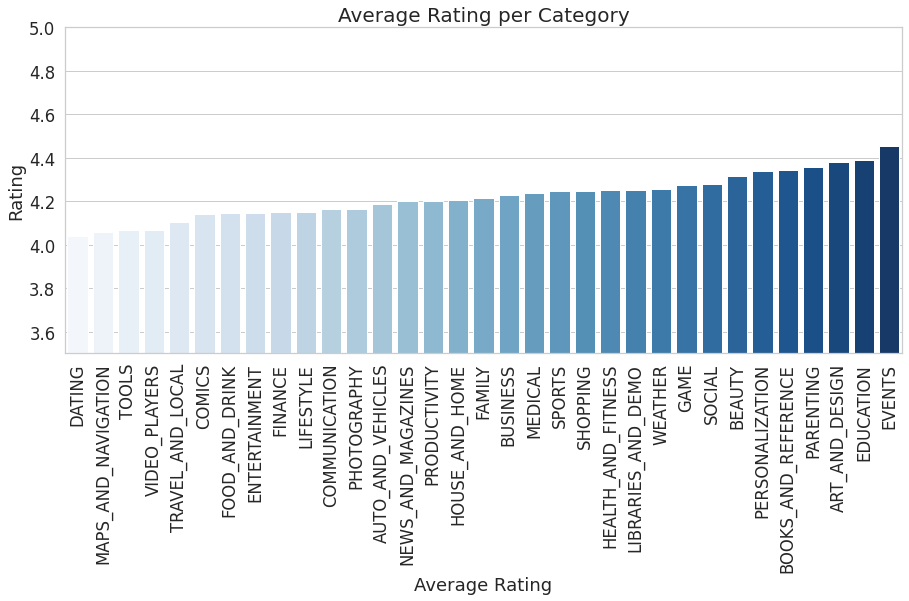

In [32]:
#look at the ratings per app category in a sequential order

#prepare data and sort
new_df = store_df.groupby("Category").Rating.mean().reset_index() #average ratings per category
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we have categorical data in the x axis, we will look data with a barplot
ax = sns.barplot(x="Category", y="Rating", data=sorted_df, palette="Blues") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotate every xticklabels for readability
ax.set(ylim=(3.5,5)) #zoom in y axes since values are distributed around 4
plt.xlabel("Average Rating")
plt.title("Average Rating per Category", size=20)



   App ratings per categpory are distributed between 4.0 and 4.5
   

**Analysis 6: How many apps are there in each category?**

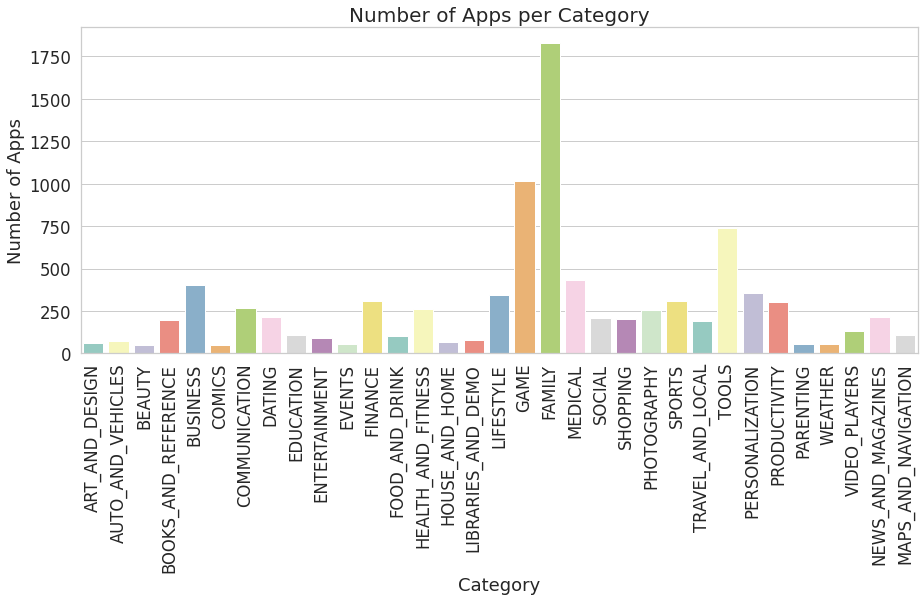

In [33]:
#look at the number of apps per category
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we are going to count # of apps per each category we are going to use barplot
ax = sns.countplot(x="Category", data=store_df, palette="Set3")
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)


*   Art And Design and Events category is having the least number of apps but they have the highest average rating

*   Game and Family category apps have outnumbered the other apps









<b> Analysis 7: Do we have a correlation between price of the app and rating?




Text(0.5, 1.0, 'Price VS Rating')

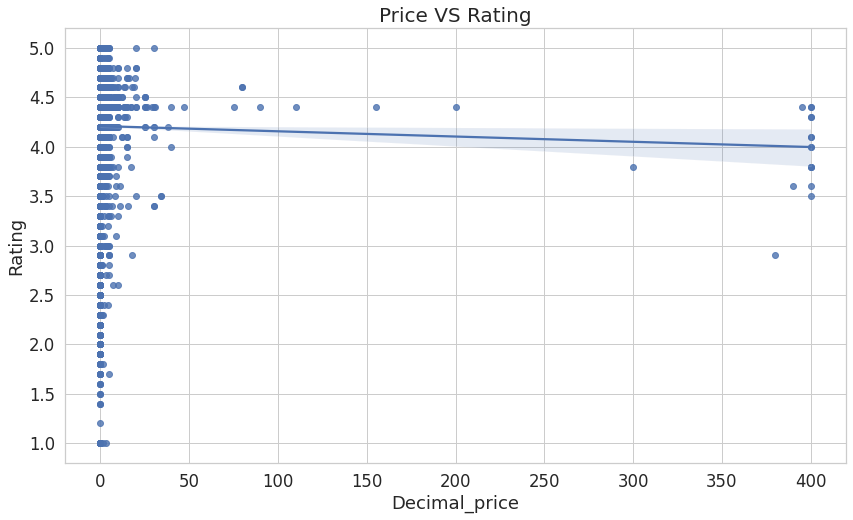

In [28]:
#we are going to plot multiple linear regressions to answer this question
#linear regression looks for the correlation between continuous variables
#price was string so change it to integer

store_df['Decimal_price'] = store_df.Price.replace(to_replace = '\$', value='', regex=True)
#add new column and remove special characters

store_df.Decimal_price = store_df.Decimal_price.astype('float')
#change to float

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Decimal_price", y="Rating", data=store_df)
plt.title("Price VS Rating", size=20)

<i> Price VS Rating


*   Yes, as the price increases ratings received seems to decrease even below the average rating in the Playstore
*   Looks like apps either has a price lower than 100, or price greater than 300



<b> Analysis 8: Which genres addresses which audience ?

In [29]:
print(len(store_df.Genres.unique()))
print(store_df.Genres.unique())
#looks like we have genres and its sub genre seperated by semi colons, format is:
#main_genre; sub_genre

print(store_df["Content Rating"].unique())

116
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education' 'Education;Creativity'
 'Education;Education' 'Education;Action & Adventure'
 'Education;Pretend Play' 'Education;Brain Games' 'Entertainment'
 'Entertainment;Brain Games' 'Entertainment;Music & Video' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Lifestyle;Pretend Play'
 'Adventure;Action & Adventure' 'Arcade' 'Casual' 'Card'
 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports' 'Word'
 'Racing' 'Casual;Creativity' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Education'
 'Card;Brain Games' 'Educational;Brain Games' 'E

In [30]:
#divide genre columns and clean Content Rating
store_df["Main_genre"] = store_df.Genres.apply(lambda x: x.split(";")[0])
store_df["Sub_genre"] = store_df.Genres.apply(lambda x: x.split(";")[1] if x.find(";")>0 else "NA")
store_df["Content Rating"] = store_df["Content Rating"].replace(to_replace = 'Unrated', value='Everyone', regex=True)

Text(0.5, 1.0, 'Genre and Content Rating')

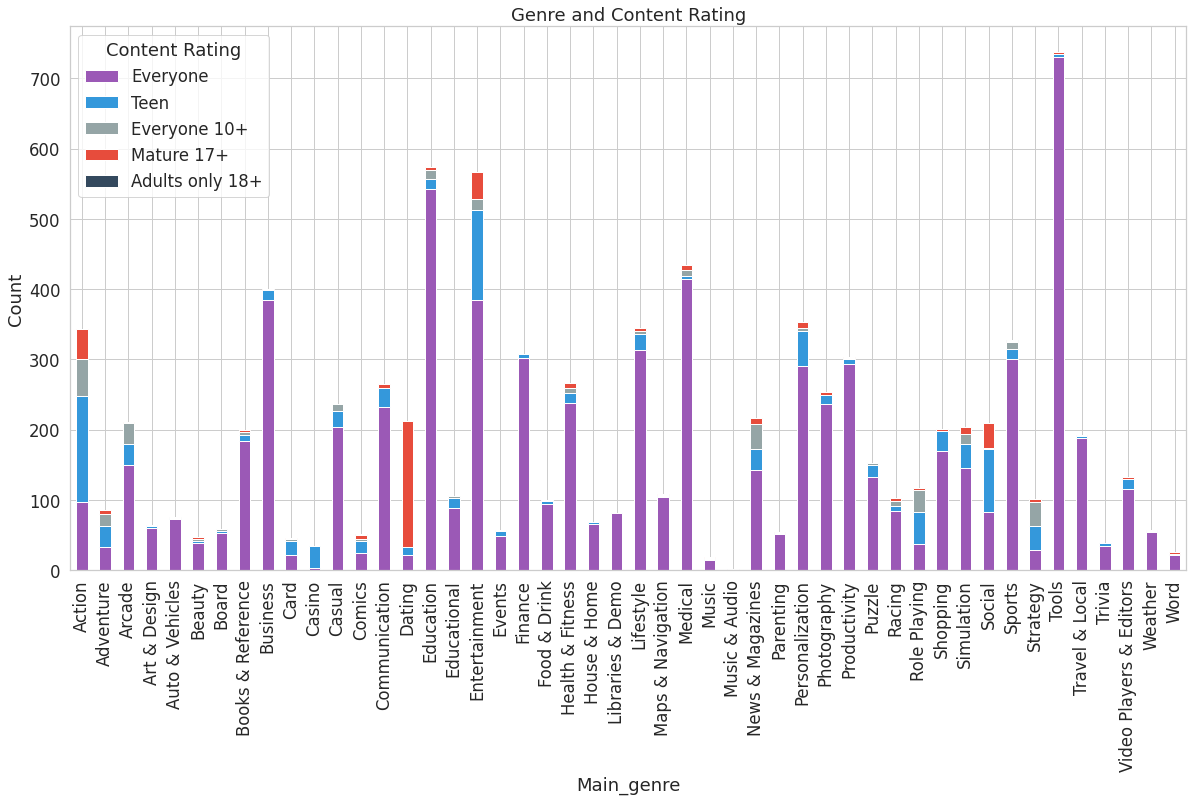

In [31]:
#we are going to look at the data with the stacked bars with pandas dataframe
#create count view per main_genre and content rating
df_by_main_genre = store_df.groupby(["Main_genre", "Content Rating"]).count().reset_index().sort_values(
    by=["App"], ascending=False).reset_index()

#select relevant columns
df_by_main_genre= df_by_main_genre[["Main_genre", "Content Rating", "App"]]

#reshape data to plot stacked bars
df_pivoted = df_by_main_genre.pivot(columns="Content Rating", index="Main_genre", values="App")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
df_pivoted.loc[:,store_df["Content Rating"].unique()].plot.bar(stacked=True, color=colors, figsize=(20,10))
plt.ylabel("Count")
plt.title("Genre and Content Rating")



*  Almost every app genre is for everyone
*  But dating apps are for mostly for mature individuals rather than everyone :)
*  Actions genre is mostly for Teens



